## Steps in this workbook
- Read in dataset
- Tokenize data
- Clean data (remove punctuation, casing, etc.)
- Remove stop words
- Select top 30 words by patient
- Combine into unique vocabulary set
- Convert dataframe into a TF IDF DTM with the unique vocabulary set as columns
- Apply PCA to reduce features
- Clustering
- Visualize in 3D
- Check most common words of each feature

In [1]:
import pandas as pd

# Load the input data
df = pd.read_csv("patient_notes.csv")

# View data
df

pn_num  case_num                                         pn_history
0           0         0  17-year-old male, has come to the student heal...
1           1         0  17 yo male with recurrent palpitations for the...
2           2         0  Dillon Cleveland is a 17 y.o. male patient wit...
3           3         0  a 17 yo m c/o palpitation started 3 mos ago; \...
4           4         0  17yo male with no pmh here for evaluation of p...
...       ...       ...                                                ...
42141   95330         9  Ms. Madden is a 20 yo female presenting w/ the...
42142   95331         9  A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143   95332         9  Ms. Madden is a 20yo female who presents with ...
42144   95333         9  Stephanie madden is a 20 year old woman compla...
42145   95334         9  patient is a 20 yo F who presents with a heada...

[42146 rows x 3 columns]

In [2]:
# Turn dashes into spaces
df['pn_history'] = df['pn_history'].str.replace('-', ' ')
df

pn_num  case_num                                         pn_history
0           0         0  17 year old male, has come to the student heal...
1           1         0  17 yo male with recurrent palpitations for the...
2           2         0  Dillon Cleveland is a 17 y.o. male patient wit...
3           3         0  a 17 yo m c/o palpitation started 3 mos ago; \...
4           4         0  17yo male with no pmh here for evaluation of p...
...       ...       ...                                                ...
42141   95330         9  Ms. Madden is a 20 yo female presenting w/ the...
42142   95331         9  A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143   95332         9  Ms. Madden is a 20yo female who presents with ...
42144   95333         9  Stephanie madden is a 20 year old woman compla...
42145   95334         9  patient is a 20 yo F who presents with a heada...

[42146 rows x 3 columns]

In [3]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
# Ensure you have the necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('english')) # remove stop words
custom_stopwords = ['none', 'week', 'weeks', 'month', 'months', 'yo', 'year', 'old', 'days', 'ago', 'mother', 'father', 'husband' 'wife', 'boyfriend', 'girlfriend', 'history']
stop_words.update(custom_stopwords)

# Function to clean and tokenize text
def clean_tokenize(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lower case
    tokens = [t for t in tokens if t.isalpha()]  # Remove punctuation
    tokens = [t for t in tokens if t not in stop_words]  # Remove stopwords
    # Josh to add date, number, age, typo fixes
    return tokens

In [4]:
# Apply the function to your text data
df['cleaned_text'] = df['pn_history'].apply(clean_tokenize)

df

pn_num  case_num                                         pn_history  \
0           0         0  17 year old male, has come to the student heal...   
1           1         0  17 yo male with recurrent palpitations for the...   
2           2         0  Dillon Cleveland is a 17 y.o. male patient wit...   
3           3         0  a 17 yo m c/o palpitation started 3 mos ago; \...   
4           4         0  17yo male with no pmh here for evaluation of p...   
...       ...       ...                                                ...   
42141   95330         9  Ms. Madden is a 20 yo female presenting w/ the...   
42142   95331         9  A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...   
42143   95332         9  Ms. Madden is a 20yo female who presents with ...   
42144   95333         9  Stephanie madden is a 20 year old woman compla...   
42145   95334         9  patient is a 20 yo F who presents with a heada...   

                                            cleaned_text  
0      [male, come, student, health, clinic, complain...  
1      [male, recurrent, palpitations, past, mo, last...  
2      [dillon, cleveland, male, patient, significant...  
3      [palpitation, started, mos, nothing, improves,...  
4      [male, pmh, evaluation, palpitations, states, ...  
...                                                  ...  
42141  [madden, female, presenting, worst, ha, life, ...  
42142  [f, came, complain, dull, headache, associated...  
42143  [madden, female, presents, headache, duration,...  
42144  [stephanie, madden, woman, complaining, headac...  
42145  [patient, f, presents, headache, said, never, ...  

[42146 rows x 4 columns]

In [5]:
from collections import Counter

# Function to return top N words for a series of token lists
def top_n_words(token_lists, n=30):
    counter = Counter()
    for tokens in token_lists:
        counter.update(tokens)
    return [word for word, count in counter.most_common(n)]

# Group by 'case_number' and apply the top_n_words function
top_words_per_case = df.groupby('case_num')['cleaned_text'].apply(top_n_words)

top_words_per_case

case_num
0    [heart, denies, chest, last, episodes, episode...
1    [pain, last, ibuprofen, denies, past, diarrhea...
2    [periods, last, years, htn, irregular, denies,...
3    [pain, denies, tums, back, motrin, epigastric,...
4    [denies, nervousness, changes, husband, asleep...
5    [palpitations, episodes, denies, last, changes...
6    [pain, asthma, chest, albuterol, denies, tylen...
7    [periods, last, denies, every, cancer, heavy, ...
8    [son, denies, htn, asleep, sleep, sleeping, am...
9    [pain, headache, yesterday, denies, tylenol, d...
Name: cleaned_text, dtype: object

In [9]:
for case in top_words_per_case:
    print("----------------")
    for word in case[0:9]:
        print(word)

----------------
heart
denies
chest
last
episodes
episode
pounding
adderall
drinks
----------------
pain
last
ibuprofen
denies
past
diarrhea
hours
rlq
dull
----------------
periods
last
years
htn
irregular
denies
vaginal
changes
pain
----------------
pain
denies
tums
back
motrin
epigastric
uncle
nausea
pmh
----------------
denies
nervousness
changes
husband
asleep
tylenol
pmh
appetite
decreased
----------------
palpitations
episodes
denies
last
changes
job
years
pmh
heart
----------------
pain
asthma
chest
albuterol
denies
tylenol
induced
deep
exercise
----------------
periods
last
denies
every
cancer
heavy
use
pain
past
----------------
son
denies
htn
asleep
sleep
sleeping
ambien
trouble
breast
----------------
pain
headache
yesterday
denies
tylenol
dull
ibuprofen
pmh
worse


In [10]:
# Combine all words in each list into one vocabulary list
vocabulary = []
for case in top_words_per_case:
    for word in case:
        vocabulary.append(word)

print(len(vocabulary))

300


In [11]:
# Flatten the list of lists to create a set of unique words
unique_words = {word for word_list in top_words_per_case for word in word_list}

len(unique_words)

147

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=unique_words)

# Create the DTM using TF-IDF
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'].apply(lambda x: ' '.join(x)))

dtm_tfidf

<42146x147 sparse matrix of type '<class 'numpy.float64'>'
	with 1056400 stored elements in Compressed Sparse Row format>

In [13]:
dtm_tfidf.shape

(42146, 147)

In [14]:
tfidf_vectorizer.get_feature_names_out()

array(['abdominal', 'aches', 'active', 'adderall', 'albuterol',
       'allergies', 'also', 'ambien', 'appetite', 'asleep', 'associated',
       'asthma', 'aunt', 'back', 'bending', 'bleeding', 'breast',
       'burning', 'cancer', 'care', 'cervical', 'changes', 'chest',
       'cold', 'college', 'constant', 'construction', 'cough', 'day',
       'decreased', 'deep', 'denies', 'depression', 'diarrhea', 'died',
       'difficulty', 'drinks', 'dryness', 'dull', 'ed', 'energy',
       'english', 'epigastric', 'episode', 'episodes', 'every',
       'exercise', 'f', 'falling', 'feeling', 'fh', 'flashes', 'flow',
       'food', 'hctz', 'head', 'headache', 'heart', 'heavy', 'high',
       'home', 'hot', 'hours', 'htn', 'husband', 'hx', 'ibuprofen',
       'increased', 'induced', 'inhaler', 'interest', 'irregular', 'iud',
       'job', 'last', 'lectures', 'left', 'light', 'lisinopril', 'lmp',
       'loss', 'marijuana', 'meds', 'mi', 'migraines', 'minutes',
       'morning', 'motrin', 'movemen

## ML implementation

ML Pipeline: This should include normalization of your data to ensure uniformity and outlier analysis to identify and address any anomalies in your dataset.

Dimension Reduction: Apply dimension reduction techniques. The aim here is to reduce the complexity of your data while retaining its essential characteristics. This step is crucial for effective clustering.

Clustering: With your data preprocessed and dimensionally reduced, apply clustering techniques. Choose appropriate clustering algorithms to identify patterns and groupings in your dataset.

Took this a step further to see if we are able to use unsupervised learning to accurately separate our doctor's notes by patient. An example use case for this could be if we for some reason lost the labels, and needed to figure out which belonged to which patient.

In [13]:
# Normalize Data
# TBD

In [15]:
# Apply PCA to my DTM dtm_tfidf
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=0.65, random_state=42)

# Fit the model
pca.fit(dtm_tfidf.toarray())

PCA(n_components=0.65, random_state=42)

In [16]:
# Transform the data
dtm_tfidf_pca = pca.transform(dtm_tfidf.toarray())
print("Shape of original DTM: ", dtm_tfidf.shape)
print("Shape of transformed DTM: ", dtm_tfidf_pca.shape)

Shape of original DTM:  (42146, 147)
Shape of transformed DTM:  (42146, 39)


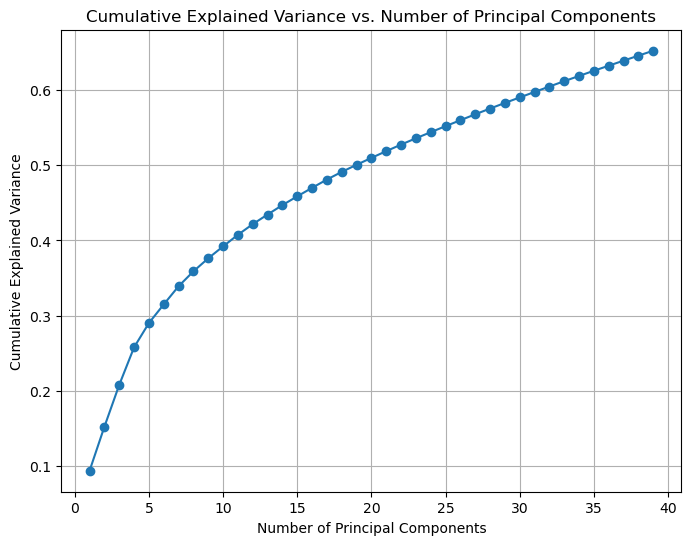

In [17]:
import matplotlib.pyplot as plt

# Calculate the cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

In the plot above it is clearly visible that we get a variance of almost 30% when the number of principal components is 5. A proportion of the dataset's variance is shown by each principal component. We can choose to incorporate or ignore the rest of the data after the first 30% of variance is considered. 30% data from only 5 principal components reduces the dimensions by a large value while giving us considerable amount of data.

The graph of cumulative variance vs. number of principal components usually results in a curve with a sharp turn or elbow. In the above graph this elbow can be seen at 30% Cumulative Explained Variance and at 5 Number of Principal Components. So we consider the n_components attribute to be five for the following step.

As we progress in the code, we can see that the clusters with these data values are comparatively more clearly divided. This only strengthens the decision of considering the above values.

For the above graph, 65% of the total data components are considered.

In [18]:
# Apply PCA to my DTM dtm_tfidf
from sklearn.decomposition import PCA

# Initialize PCA model with 3 components
pca = PCA(n_components=5, random_state=42) #n_components=70

# Fit the model
dtm_tfidf_pca = pca.fit_transform(dtm_tfidf.toarray())

print("Shape of transformed DTM: ", dtm_tfidf_pca.shape)

Shape of transformed DTM:  (42146, 5)


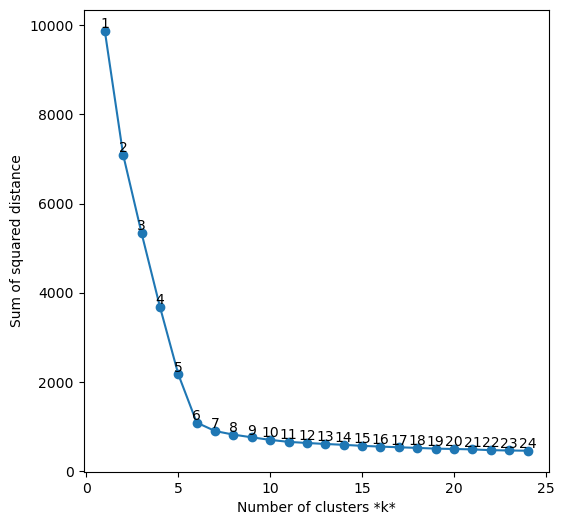

In [19]:
from sklearn.cluster import KMeans

ssd = [] #sum of squared distance
list_k = list(range(1,25)) # deciding range of number of clusters

for k in list_k:
    km = KMeans(n_init = 10, n_clusters = k)
    km.fit(dtm_tfidf_pca)
    ssd.append(km.inertia_)
    
#ssd against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, ssd, '-o')

for k, s in zip(list_k, ssd):
    plt.text(k, s + 0.1, str(k), ha='center', va='bottom')

plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

### Elbow Method:
The above graph implements the Elbow Method which suggests a good number of clusters for any given data. There is usually a sharp turn or bend in the graph. The bend is called an elbow and it is this elbow that suggests the best number of clusters for the provided data.

For our data, the suggested best number of clusters from the above graph is 6. This number is just a suggestion and there are scenarios where this might not be the ideal number of clusters.

### Silhouette Analysis:
To make sure that this is the best suggestion, we can use another technique called Silhouette Analysis. Here the average distance from all data points in the same cluster and closest cluster is calculated. These values are used to calculate the coefficient. The bigger the value of the coefficient, the more suitable those number of clusters are. The coefficient values are between -1 to 1 and the value closest to 1 is considered.

k =  4   0.49424630488859483
k =  6   0.6656531955008713
k =  8   0.5479915320700698


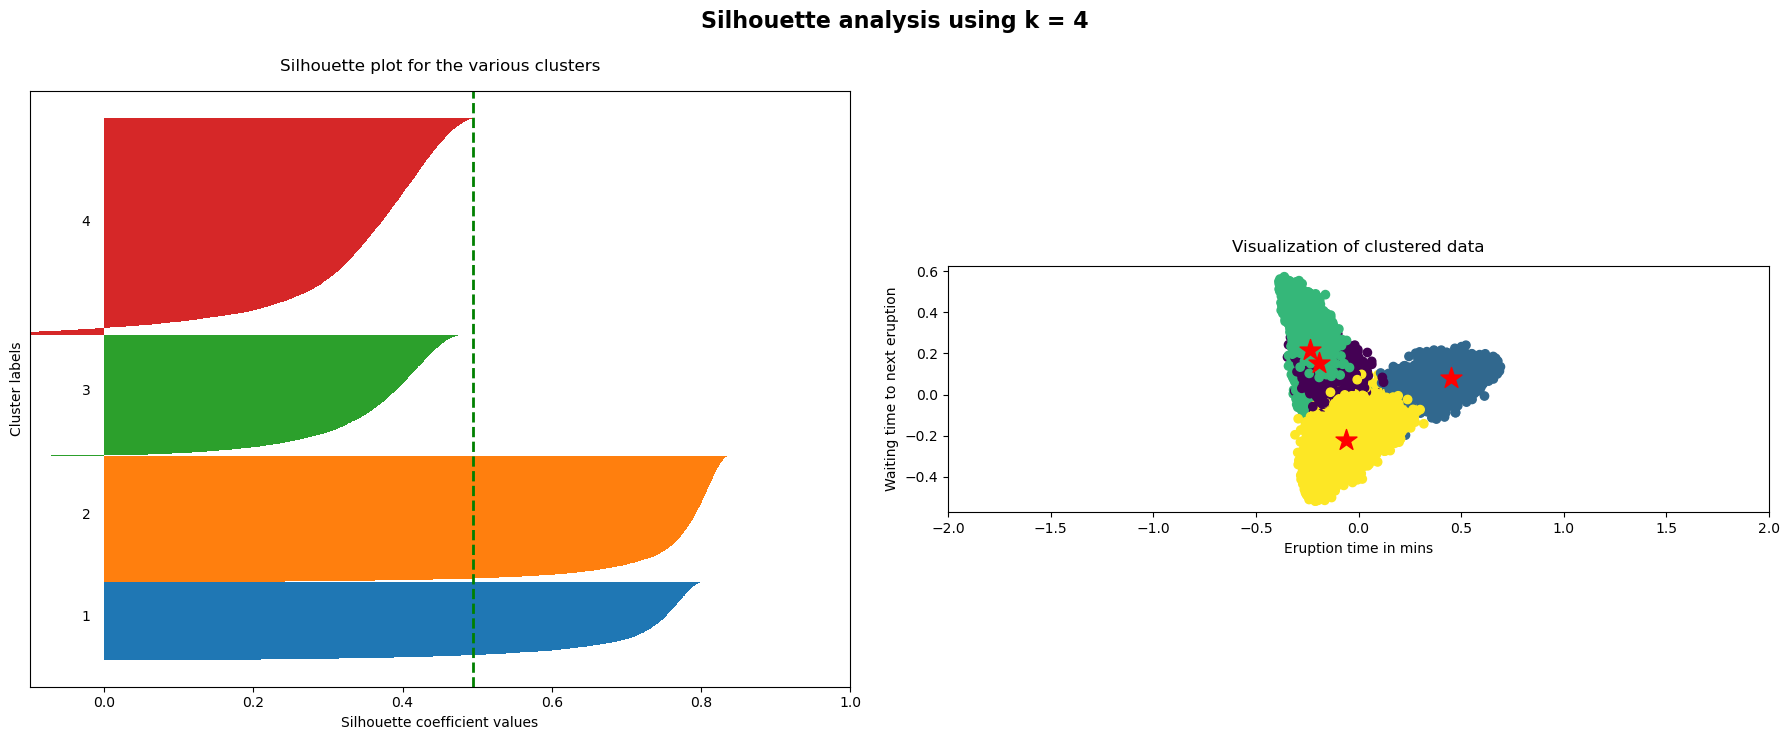

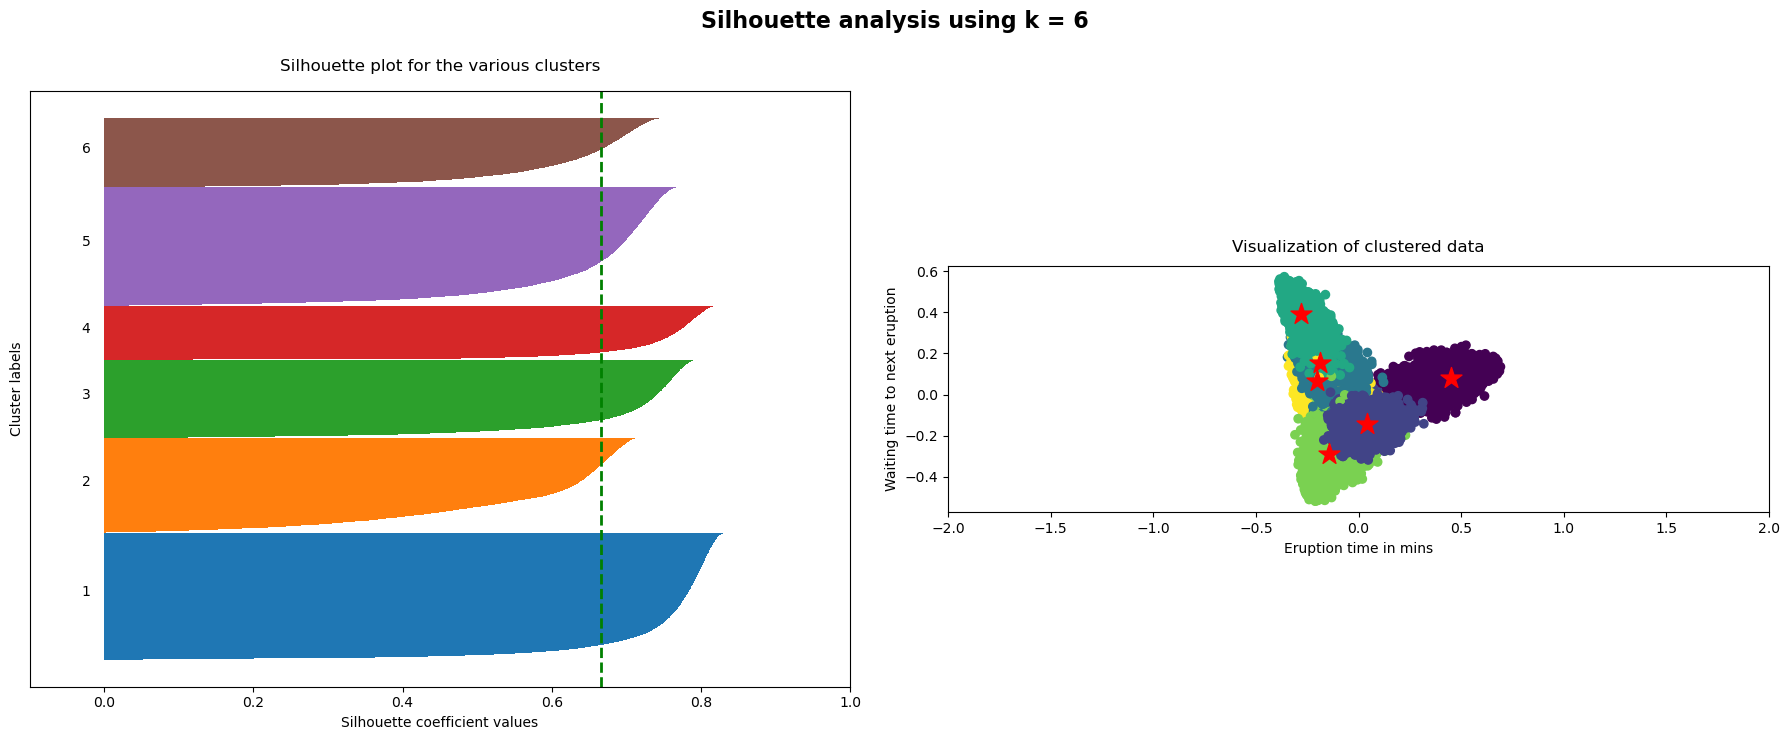

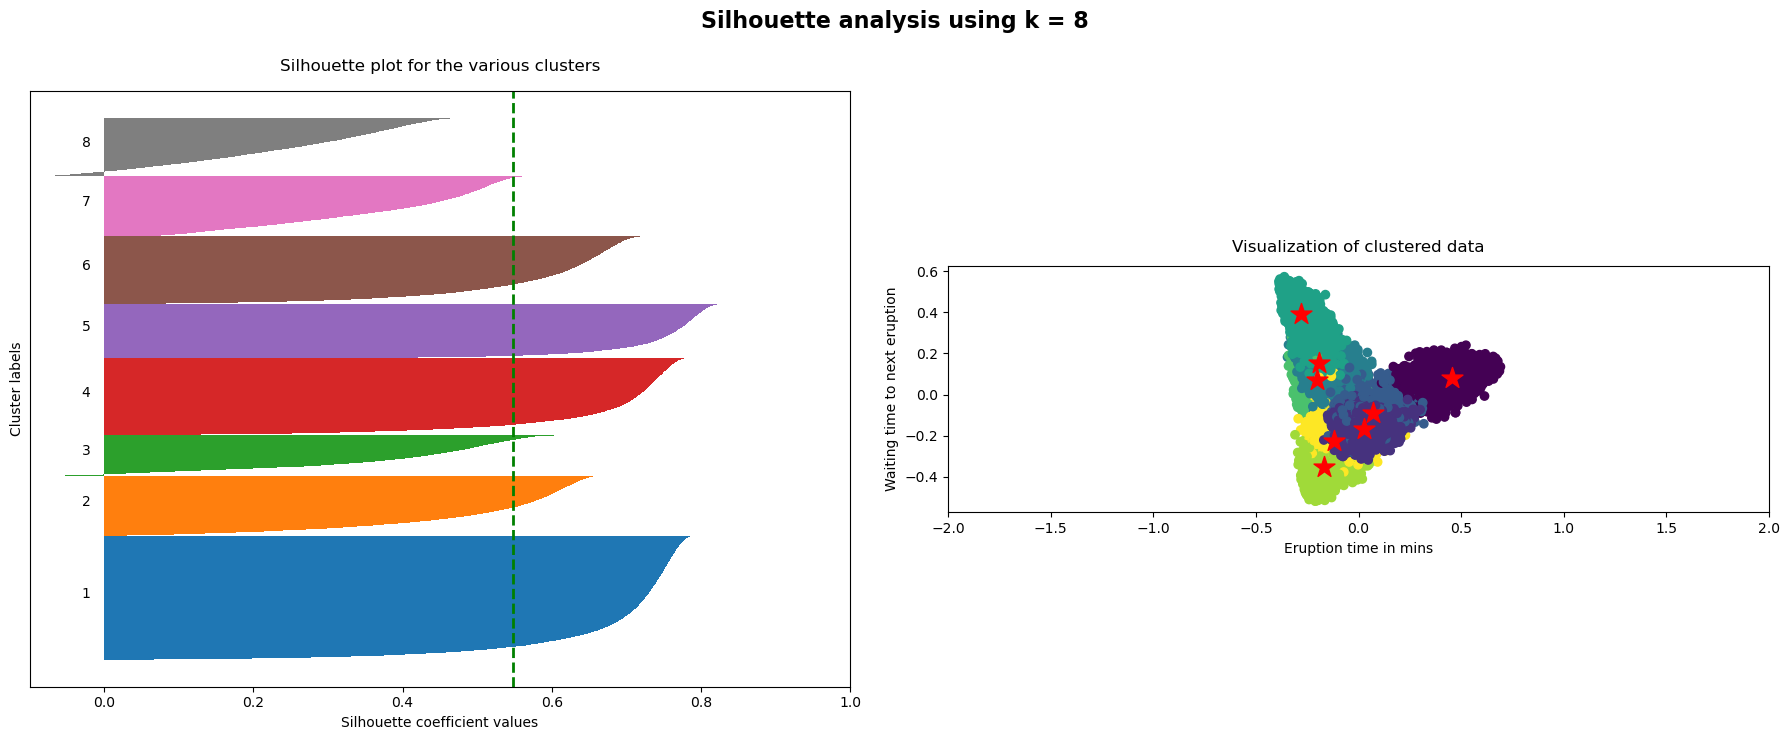

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

for i, k in enumerate([4, 6, 8]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_init = 10, n_clusters=k)
    labels = km.fit_predict(dtm_tfidf_pca)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(dtm_tfidf_pca, labels)
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        
        
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average Score for k = ", k, ": ", avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dtm_tfidf_pca[:, 0], dtm_tfidf_pca[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

From the average scores for k = 4, 6 and 8, we can see that k = 6 has the best average score. To make sure that 6 is the most ideal number of clusters, let us also find the silhouettes for k = 5 and k = 7 and compare their scores with k = 6 where k is the number of clusters.

Average Score for k =  5 :  0.5922321763419724
Average Score for k =  6 :  0.6656550196431628
Average Score for k =  7 :  0.6090798613810205


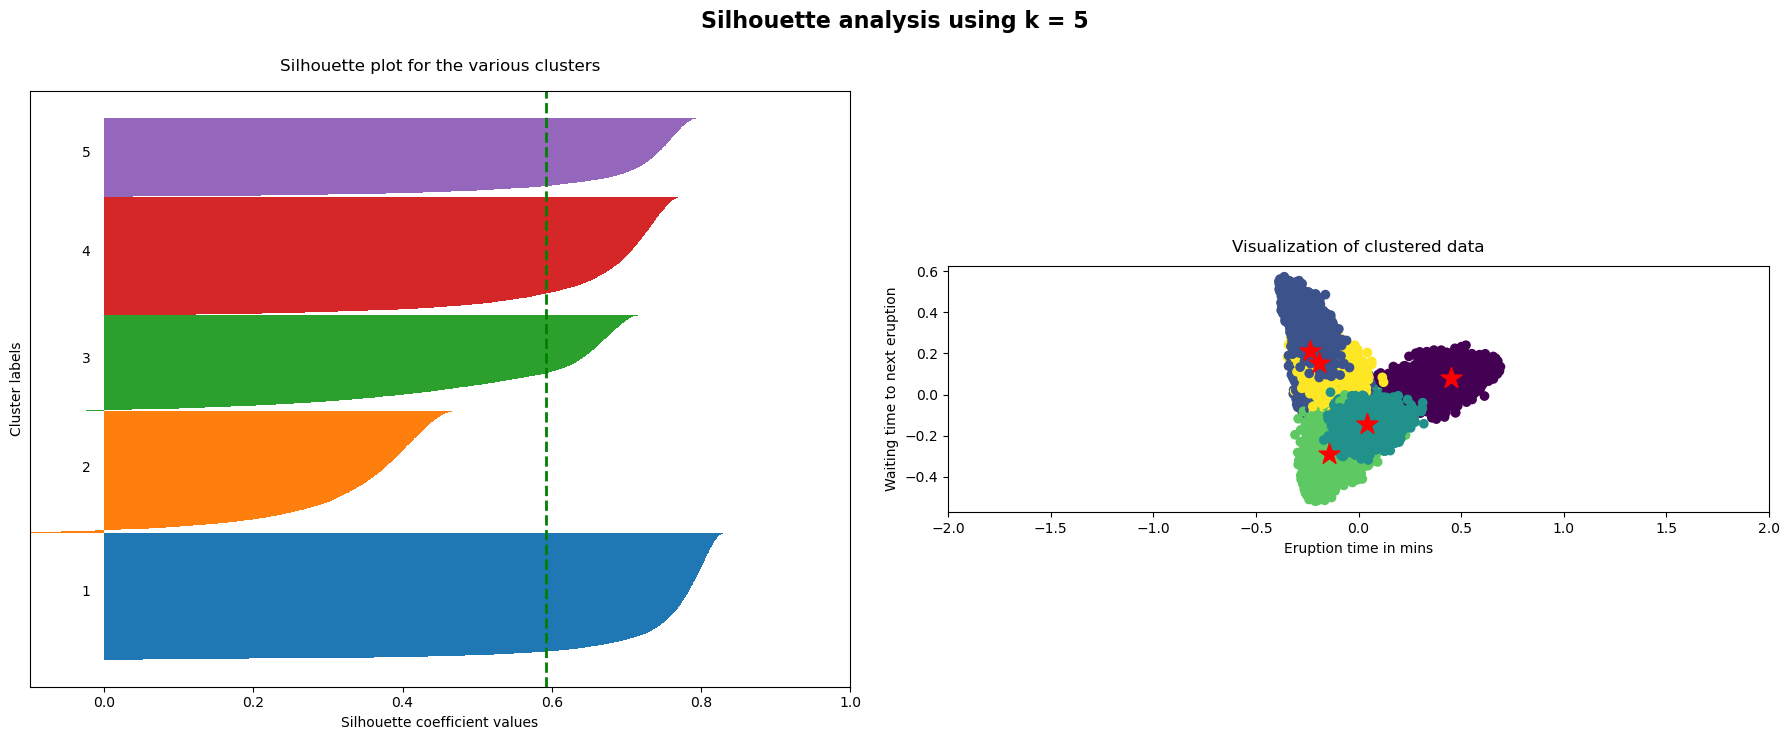

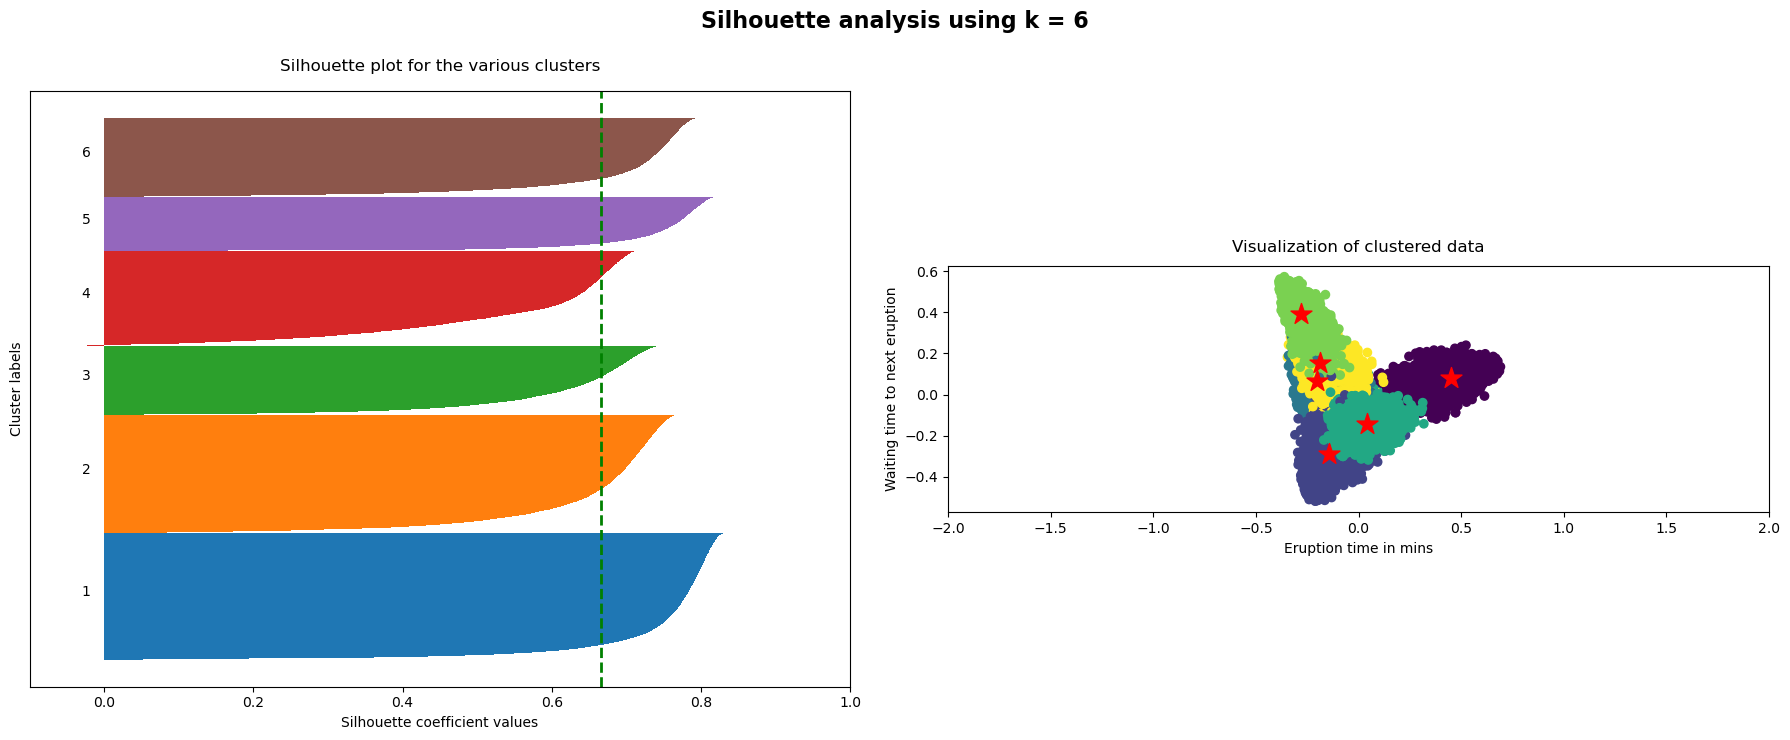

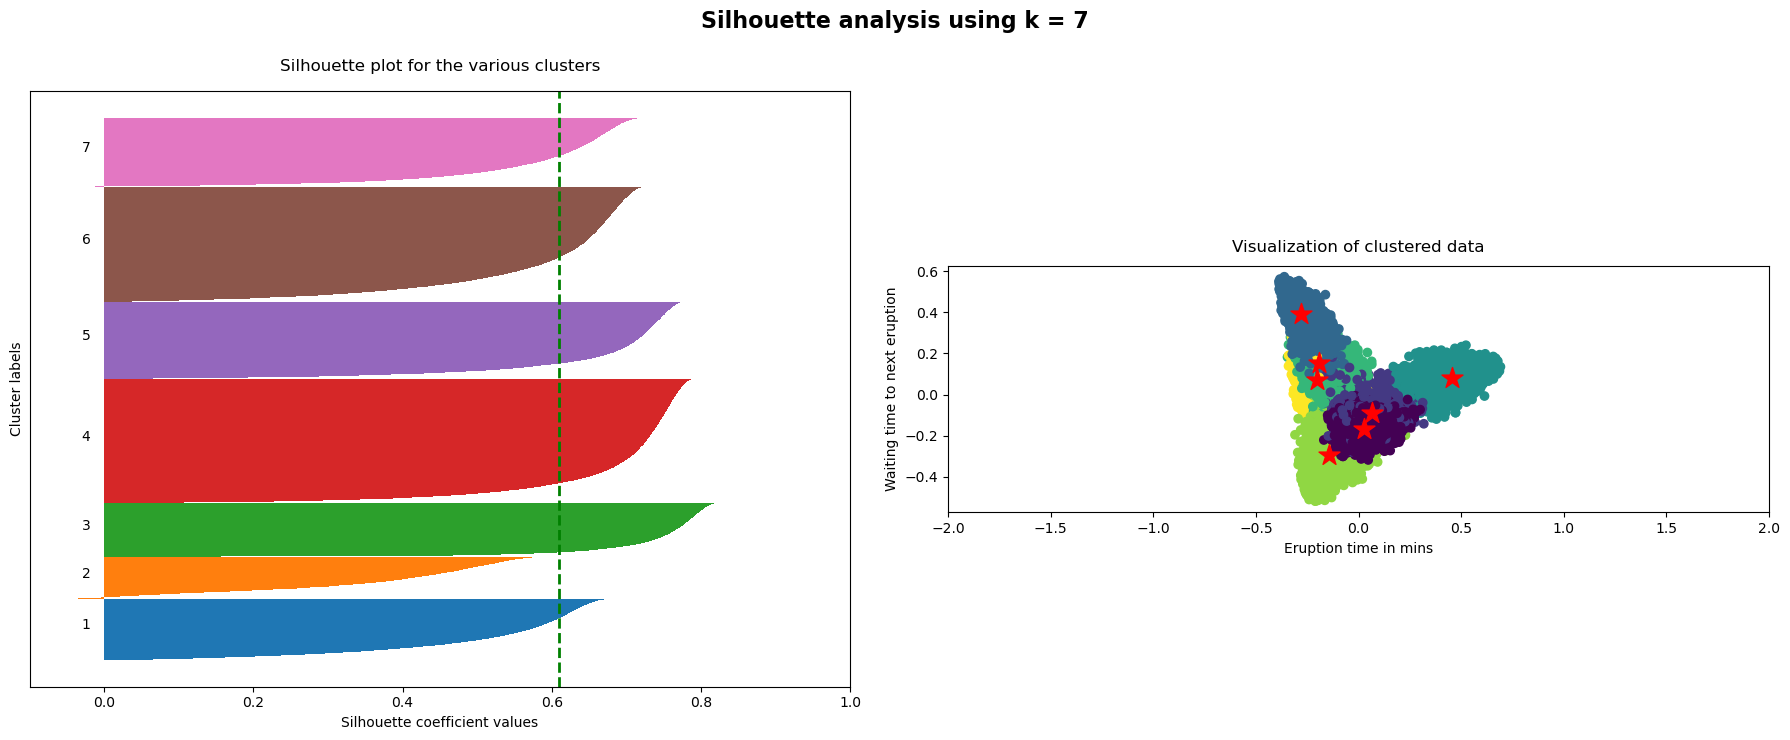

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

for i, k in enumerate([5, 6, 7]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_init = 10, n_clusters=k)
    labels = km.fit_predict(dtm_tfidf_pca)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(dtm_tfidf_pca, labels)
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average Score for k = ", k, ": ", avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dtm_tfidf_pca[:, 0], dtm_tfidf_pca[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Continuing with 6 clusters based on the above values.

In [50]:
from sklearn.cluster import KMeans

# Initialize K-means model with 6 clusters
kmeans = KMeans(n_init = 10, n_clusters=6, random_state=42)

# Fit the K-means model to the reduced data
kmeans.fit(dtm_tfidf_pca)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [51]:
cluster_labels = kmeans.labels_

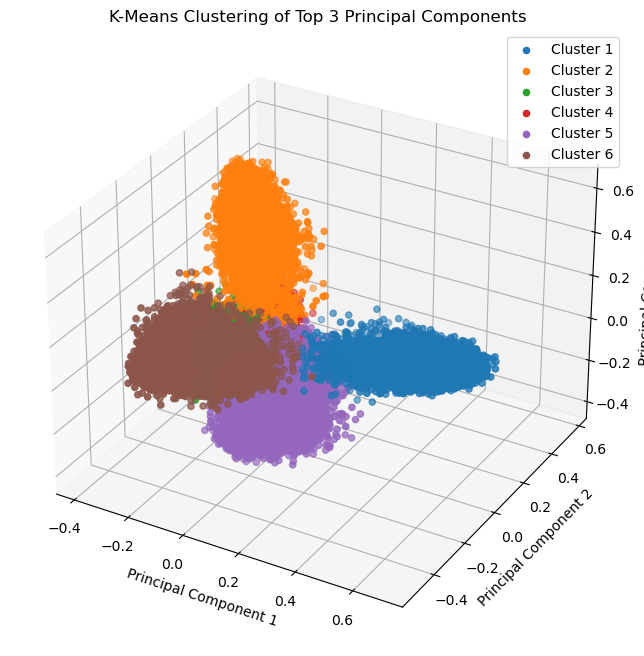

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each data point colored by cluster label
for cluster in range(6):
    ax.scatter(dtm_tfidf_pca[cluster_labels == cluster][:, 0], 
               dtm_tfidf_pca[cluster_labels == cluster][:, 1], 
               dtm_tfidf_pca[cluster_labels == cluster][:, 2], 
               label=f'Cluster {cluster + 1}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering of Top 3 Principal Components')
plt.legend()
plt.show()

In [53]:
# pip install plotly

import plotly.express as px

# Create a DataFrame with the cluster labels
cluster_df = pd.DataFrame({'PC1': dtm_tfidf_pca[:, 0], 'PC2': dtm_tfidf_pca[:, 1], 'PC3': dtm_tfidf_pca[:, 2], 'Cluster': cluster_labels})

# Create the interactive 3D scatter plot
fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', color='Cluster', labels={'Cluster': 'Cluster'}, title='K-Means Clustering of Top 3 Principal Components (Interactive)')
fig.update_traces(marker=dict(size=6))
fig.show()

In [54]:
cluster_df

PC1       PC2       PC3  Cluster
0     -0.037463 -0.183947 -0.051301        5
1     -0.100265 -0.190925 -0.007755        5
2     -0.050733 -0.242067 -0.021582        5
3      0.010846 -0.176632 -0.026002        4
4     -0.193422 -0.181064 -0.035430        5
...         ...       ...       ...      ...
42141  0.167096 -0.163115 -0.302611        4
42142 -0.032890 -0.174413 -0.214243        4
42143 -0.024470 -0.202701 -0.264869        4
42144  0.031324 -0.170725 -0.331749        4
42145  0.081668 -0.165188 -0.203279        4

[42146 rows x 4 columns]

In [55]:
from collections import Counter
import pandas as pd

# Combine cluster labels with the original text data
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'Text': df['cleaned_text'], 'Patient': df['case_num']})

# Initialize a dictionary to store the most common words for each cluster
common_words_by_cluster = {}

# Loop through each cluster
for cluster in range(6):
    # Select text data for the current cluster
    cluster_texts = cluster_df[cluster_df['Cluster'] == cluster]['Text']
    
    # Initialize a list to store the tokens for the current cluster
    cluster_tokens = []
    
    # Iterate through individual text entries and collect tokens
    for text in cluster_texts:
        cluster_tokens.extend(text)
    
    # Count the occurrences of each word
    word_counts = Counter(cluster_tokens)
    
    # Get the most common words (you can adjust the number)
    most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of words
    
    # Store the most common words in the dictionary
    common_words_by_cluster[f'Cluster {cluster + 1}'] = most_common_words

# Print the most common words for each cluster
for cluster, common_words in common_words_by_cluster.items():
    print(f"Cluster {cluster}:")
    for word, count in common_words:
        print(f"{word}: {count}")
    print()

Cluster Cluster 1:
pain: 45132
denies: 10795
tums: 10059
back: 9290
motrin: 8591
epigastric: 7774
uncle: 7477
nausea: 7329
pmh: 7084
construction: 6996

Cluster Cluster 2:
periods: 13125
last: 9433
denies: 7477
years: 5974
every: 5683
pain: 5392
changes: 5072
irregular: 5043
heavy: 4944
use: 4714

Cluster Cluster 3:
denies: 7917
nervousness: 7291
changes: 4871
husband: 4251
asleep: 3794
tylenol: 3750
pmh: 3685
appetite: 3468
decreased: 3223
ros: 3184

Cluster Cluster 4:
son: 7037
denies: 5376
htn: 5042
asleep: 4379
sleep: 4209
sleeping: 4209
ambien: 3537
trouble: 3352
breast: 3271
hctz: 3232

Cluster Cluster 5:
pain: 17129
headache: 9177
denies: 8490
yesterday: 7150
tylenol: 5568
pmh: 5254
worse: 4701
ibuprofen: 4434
constant: 4424
ros: 4416

Cluster Cluster 6:
episodes: 12148
denies: 11864
palpitations: 11448
heart: 8241
last: 8210
changes: 7145
chest: 6657
pmh: 6433
use: 6270
pain: 6110



In [56]:
cluster_df

# Pivot cluster against patient with % of total patient count that belongs to each cluster (fill value = count)
cluster_pivot = cluster_df.pivot_table(index='Patient', columns='Cluster', aggfunc='size', fill_value=0)
print (cluster_pivot)

# Notes
# Cluster 1 is mostly case 2 and 7 (may be similar cases)
# Cluster 2 is case 4
# Cluster 3 is most likely case 8 (similar cases)
# Cluster 4 is most likely patients 1, 6 or 9 (similar cases)
# Cluster 5 is mostly cases 0 or 5 (similar cases)
# Cluster 0 is mostly patient 3

Cluster     0     1     2     3     4     5
Patient                                    
0           1     0     2     0     6  2259
1          96    38     0     0   644    30
2           0  1954     0     1     0     3
3        9738     0     1     0     3    11
4           0     7  5360     0    11    27
5           2    22     1     0     9  6875
6           3     0     0     0  1586     8
7           0  4091     2     0     4     4
8           0     0     3  4191     0     2
9           0     0     0     0  5146     5


In [27]:
# Group count of rows by case_num
case_counts = df.groupby('case_num').count()
case_counts

pn_num  pn_history  cleaned_text
case_num                                  
0           2268        2268          2268
1            808         808           808
2           1958        1958          1958
3           9753        9753          9753
4           5405        5405          5405
5           6909        6909          6909
6           1597        1597          1597
7           4101        4101          4101
8           4196        4196          4196
9           5151        5151          5151